## Purpose
This notebook is made to help analysing results produced by TeachMyAgent's experiments. Using this, one can reproduce the figures we provide in our [paper](https://arxiv.org/abs/2103.09815). 

## How to use this notebook
This notebook is broken down into 4 sections:
- **Imports**: import needed packages.
- **Load Data**: load results produced by experiments and format them (e.g. calculate percentage of mastered tasks).
- **Plot definitions**: define all the plot functions we provide.
- **Experiment graphs**: use the previously defined functions to generate the different figures we show in our paper.

## Add our paper's results to your plots
In order to add the results we provide in our paper to your plots, make sure you have downloaded them:
1. Go to the `notebooks` folder
2. Make the `download_baselines.sh` script executable: `chmod +x download_baselines.sh`
3. Download results: `./download_baselines.sh`
> **_WARNING:_**  This will download a zip weighting approximayely 4GB. Then, our script will extract the zip file in `TeachMyAgent/data`. Once extracted, results will weight approximately 15GB. 
----

# Imports

In [1]:
import sys
import os
import os.path as osp
import random
import math
import pylab
import copy
import re
from enum import Enum
from collections import OrderedDict

import numpy as np
import pandas as pd
import scipy.stats as ss

import matplotlib.pyplot as plt
import seaborn as sns

DIV_LINE_WIDTH = 50
print(np.__version__)
print(sys.executable)
sns.set()

1.18.5
/home/cromac/anaconda3/bin/python


In [4]:
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from TeachMyAgent.students.run_logs_util import get_run_logs

# Load Data

In [8]:
def get_datasets(rootdir, name_filter=None, rename_labels=False):
    """
        Loads results of experiments.
 
        Results to load can be filtered by their name and each experiment can be associated to a label (usually ACL method's name)
 
        :param rootdir: Directory containing experiments to load (do not forget '/' at the end of the path)
        :param name_filter: String experiments to load must contain
        :param rename_labels: If True, each experiment will be associated to a label (see below). Labels are the names that will appear in plots.
        :type rootdir: str
        :type name_filter: str (or None)
        :type rename_labels: boolean
    """
    global default_colors_palette
    _, models_list, _ = next(os.walk(rootdir))
    print(models_list)
    for dir_name in models_list.copy():
        if "ignore" in dir_name:
            models_list.remove(dir_name)
        if name_filter is not None and name_filter not in dir_name:
            models_list.remove(dir_name)
            
    # setting per-model type colors
    if len(per_model_colors) == 0 and  len(models_list) > len(default_colors_palette):
        default_colors_palette = sns.color_palette("hls", len(models_list))
        
    for i,m_name in enumerate(models_list):
        for m_type, m_color in per_model_colors.items():
            if m_type in m_name:
                colors[m_name] = m_color
        if m_name not in colors:
            colors[m_name] = default_colors_palette[i]
            
        print("extracting data for {}...".format(m_name))
        m_id = m_name
        models_saves[m_id] = OrderedDict()
        models_saves[m_id]['data'] = get_run_logs(rootdir+m_name, book_keeping_keys=['env_test_rewards'], min_len=0)
        print("done")
        if m_name not in labels:
            if not rename_labels:
                labels[m_name] = m_name
            else:
                ##### MODIFY THIS IF YOU ADD A NEW METHOD #####
                if 'ADR' in m_name:
                    labels[m_name] = 'ADR'
                elif 'ALP-GMM' in m_name:
                    labels[m_name] = 'ALP-GMM'
                elif 'Random' in m_name:
                    labels[m_name] = 'Random'
                elif 'Covar-GMM' in m_name:
                    labels[m_name] = 'Covar-GMM'
                elif 'RIAC' in m_name:
                    labels[m_name] = 'RIAC'
                elif 'GoalGAN' in m_name:
                    labels[m_name] = 'GoalGAN'
                elif 'Self-Paced' in m_name:
                    labels[m_name] = 'Self-Paced'
                elif 'Setter-Solver' in m_name:
                    labels[m_name] = 'Setter-Solver'
                elif 'UPPER_BASELINE' in m_name:
                    labels[m_name] = 'UPPER_BASELINE'
                else:
                    labels[m_name] = m_name
                ##### MODIFY THIS IF YOU ADD A NEW METHOD #####
                
labels = OrderedDict()
default_colors_palette = sns.color_palette()

##### MODIFY THIS IF YOU ADD A NEW METHOD #####
per_model_colors = OrderedDict([('ALP-GMM', default_colors_palette[0]),
                                ('Covar-GMM', default_colors_palette[1]),
                                ('ADR', default_colors_palette[2]),
                                ('Random', default_colors_palette[3]),
                                ('RIAC', default_colors_palette[4]),
                                ('GoalGAN', default_colors_palette[5]),
                                ('Self-Paced', default_colors_palette[6]),
                                ('Setter-Solver', default_colors_palette[7]),
                                ('UPPER_BASELINE', default_colors_palette[8])])
##### MODIFY THIS IF YOU ADD A NEW METHOD #####

models_saves = OrderedDict()
colors = OrderedDict()

##### MODIFY THIS TO POINT TO YOUR DATA FOLDER #####
data_folder = "../TeachMyAgent/data/BENCHMARK/"
##### MODIFY THIS TO POINT TO YOUR DATA FOLDER #####

get_datasets(data_folder, rename_labels=True)
# get_datasets(data_folder, rename_labels=True, name_filter="parkour_RIAC_walker_type_fish") # You can also add filters

# order runs for legend order as in per_models_colors, with corresponding colors
if len(per_model_colors) > 0:
    ordered_labels = OrderedDict()
    for teacher_type in per_model_colors.keys():
        for k,v in labels.items():
            if teacher_type in k:
                ordered_labels[k] = v
    labels = ordered_labels

['14-12_benchmark_parkour_Setter-Solver_walker_type_climbing_profile_chimpanzee', '16-12_profiling_benchmark_stumps_RIAC_criteria_5_walker_type_small_bipedal_allow_expert_knowledge_no_student_ppo', '11-12_profiling_benchmark_stumps_Self-Paced_criteria_5_walker_type_spider_allow_expert_knowledge_minimal_student_sac_v0.1.1', '14-12_profiling_benchmark_stumps_GoalGAN_criteria_3_allow_expert_knowledge_maximal', '17-12_profiling_benchmark_stumps_Covar-GMM_criteria_5_walker_type_small_bipedal_allow_expert_knowledge_minimal_student_sac_v0.1.1', '14-12_profiling_benchmark_stumps_GoalGAN_criteria_5_walker_type_small_bipedal_allow_expert_knowledge_minimal_student_ppo', '14-12_benchmark_parkour_Setter-Solver_walker_type_fish', '18-12_profiling_benchmark_stumps_ADR_criteria_4_allow_expert_knowledge_maximal', '06-01_profiling_benchmark_stumps_GoalGAN_criteria_4_allow_expert_knowledge_maximal', '11-12_profiling_benchmark_stumps_Self-Paced_criteria_5_walker_type_spider_allow_expert_knowledge_maximal_

## Handle baseline Random teacher

Format experiments of Random teacher to make it appear in all expert knowledge setup.

In [9]:
default_configuration = "no"
configurations_to_add = ["minimal", "maximal"]
new_expes_to_add = {}
for expe_id in models_saves:
    if "profiling_benchmark_stumps_Random" in expe_id:
        for new_config in configurations_to_add:
            new_expe_id = expe_id.replace("allow_expert_knowledge_" + default_configuration,
                                          "allow_expert_knowledge_" + new_config)
            new_expes_to_add[new_expe_id] = OrderedDict()
            new_expes_to_add[new_expe_id]['data'] = copy.copy(models_saves[expe_id]['data'])
            labels[new_expe_id] = labels[expe_id]
            colors[new_expe_id] = colors[expe_id]
models_saves.update(new_expes_to_add)

## Handle Upper Baseline

Format names of upper baseline experiments.

In [10]:
criteria_to_add = ["1", "2", "3", "4"]
new_expes_to_add = {}
for expe_id in models_saves:
    if "UPPER_BASELINE" in expe_id:
        for criterion in criteria_to_add:
            new_expe_id = expe_id.replace("UPPER_BASELINE",
                                          "UPPER_BASELINE_criteria_" + criterion)
            new_expes_to_add[new_expe_id] = OrderedDict()
            new_expes_to_add[new_expe_id]['data'] = copy.copy(models_saves[expe_id]['data'])
            labels[new_expe_id] = labels[expe_id]
            colors[new_expe_id] = colors[expe_id]
models_saves.update(new_expes_to_add)

## Merge experiments by teacher

Some experiments (e.g. on parkour or criteria 5) were broken down into multiple experiments. In order to analyze them, the results must be merged. 

In [11]:
# CAREFUL: IT NEEDS RENAME_LABELS SET TO TRUE
def merge_experiments_by_teacher(experiment_name, result_name=None):
    new_saves = OrderedDict()
    anything_token = "*"
    anything_pattern = "[a-zA-z0-9\-.]*"
    experiment_name_regex_pattern = experiment_name.replace(anything_token, anything_pattern)
    regex = re.compile(experiment_name_regex_pattern)
    for expe_id in models_saves:
        if regex.match(expe_id):
            associated_label = labels[expe_id]
            if result_name is None:
                new_expe_name = experiment_name.replace('*', '').replace('|', ',') + "_" + associated_label
            else:
                new_expe_name = result_name.replace('{LABEL}', associated_label)

            if models_saves[expe_id]['data'] is not None:
                if new_expe_name not in new_saves:
                    new_saves[new_expe_name] = OrderedDict()
                    new_saves[new_expe_name]['data'] = copy.copy(models_saves[expe_id]['data'])
                    labels[new_expe_name] = associated_label
                    colors[new_expe_name] = colors[expe_id]
                else:
                    new_saves[new_expe_name]['data'].extend(copy.copy(models_saves[expe_id]['data']))
    models_saves.update(new_saves)

In [12]:
merge_experiments_by_teacher("*benchmark_parkour*")

In [13]:
merge_experiments_by_teacher("*profiling_benchmark_stumps_*_criteria_5*allow_expert_knowledge_no*", 
                             result_name="profiling_benchmark_stumps_{LABEL}_criteria_5_allow_expert_knowledge_no")

In [14]:
merge_experiments_by_teacher("*profiling_benchmark_stumps_*_criteria_5*allow_expert_knowledge_minimal*", 
                             result_name="profiling_benchmark_stumps_{LABEL}_criteria_5_allow_expert_knowledge_minimal")

In [15]:
merge_experiments_by_teacher("*profiling_benchmark_stumps_*_criteria_5*allow_expert_knowledge_maximal*", 
                             result_name="profiling_benchmark_stumps_{LABEL}_criteria_5_allow_expert_knowledge_maximal")

## Compute mastered tasks percentage

Compute "% of Mastered tasks" metric: percentage of test tasks (over a test set of 100 tasks) on which the agent obtained an episodic reward greater than a threshold (230).

In [16]:
mastered_thr = 230
for i,(m_id,label) in enumerate(labels.items()):
    print(m_id)
    runs_data = models_saves[m_id]['data']
    #collect raw perfs
    print("Seeds : " + str(len(runs_data)))
    for r,run in enumerate(runs_data):
        models_saves[m_id]['data'][r]['nb_mastered'] = []
        models_saves[m_id]['data'][r]['avg_pos_rewards'] = []
        models_saves[m_id]['data'][r]['local_rewards'] = []
        if 'env_test_rewards' in run:
            size_test_set = int(len(run['env_test_rewards'])/len(run['evaluation return']))
            for j in range(len(run['evaluation return'])):#max_epoch):
                test_data = np.array(run['env_test_rewards'][j*size_test_set:(j+1)*(size_test_set)])
                nb_mastered = len(np.where(test_data > mastered_thr)[0])
                models_saves[m_id]['data'][r]['nb_mastered'].append((nb_mastered/size_test_set)*100)
        else:
            print("Skipping seed {}".format(r))

07-12_profiling_benchmark_stumps_ALP-GMM_criteria_5_walker_type_small_bipedal_allow_expert_knowledge_no_student_sac_v0.1.1
Seeds : 32
07-12_profiling_benchmark_stumps_ALP-GMM_criteria_1_allow_expert_knowledge_no
Seeds : 32
09-12_profiling_benchmark_stumps_ALP-GMM_criteria_3_allow_expert_knowledge_maximal
Seeds : 32
09-12_profiling_benchmark_stumps_ALP-GMM_criteria_3_allow_expert_knowledge_no
Seeds : 32
07-12_profiling_benchmark_stumps_ALP-GMM_criteria_5_walker_type_small_bipedal_allow_expert_knowledge_minimal_student_sac_v0.1.1
Seeds : 32
11-12_profiling_benchmark_stumps_ALP-GMM_criteria_5_walker_type_spider_allow_expert_knowledge_no_student_ppo
Seeds : 32
07-12_profiling_benchmark_stumps_ALP-GMM_criteria_1_allow_expert_knowledge_maximal
Seeds : 32
11-12_profiling_benchmark_stumps_ALP-GMM_criteria_5_walker_type_small_bipedal_allow_expert_knowledge_no_student_ppo
Seeds : 32
18-12_profiling_benchmark_stumps_ALP-GMM_criteria_4_allow_expert_knowledge_minimal
Seeds : 32
11-12_profiling_benc

# Plots definitions

## Statistical tests

In [17]:
def get_simple_welch(d1, d2):
    """
        Calculate Welch's t-test between two distributions.
 
        :param d1: Distribution 1
        :param d2: Distribution 2
        :type d1: array (e.g. list, ndarray)
        :type d2: array (e.g. list, ndarray)
        :return: T-statistic and p-value
        :rtype: tuple
    """
    return ss.ttest_ind(d1, d2, equal_var=False)

def get_multistep_welch(algo_0, algo_1):
    """
        Calculate Welch's t-test between two list of distributions index-wise.
 
        :param algo_0: List of distributions 1
        :param algo_1: List of distributions 2
        :type algo_0: list of array (e.g. list, ndarray)
        :type algo_1: list of array (e.g. list, ndarray)
        :return: List of t-test results (of each index) and max value of the two distributions at each index
        :rtype: tuple
    """
    tt_test = []
    max_values =  []
    for i in range(min(algo_0.shape[1], algo_1.shape[1])):
        d1 = [v[i] for v in algo_0]
        d2 = [v[i] for v in algo_1]
        max_values.append(max(d1 + d2))
        tt_test.append(get_simple_welch(d1, d2))
        
    return tt_test, max_values

## Curves

### Single curve plotting

In [32]:
def plot_with_shade(subplot_nb, ax,x,y,err,color,shade_color,label,
                  legend=False, leg_size=30, leg_loc='best', title=None,
                  ylim=[0,100], xlim=[0,40], leg_args={}, leg_linewidth=8.0, linewidth=7.0,
                  ticksize=30, y_label='% Mastered env', label_size=30):
    """
        Plot a curve along with its error (shade).
 
        :param subplot_nb: Index in multi-plots figure
        :param ax: Matplotlib axis
        :param x: List of x positions
        :param y: List associated y
        :param color: Curve color 
        :param shade_color: Shade color
        :param label: Label name of the curve
        :param legend: Whether legend should be printed
        :param leg_size: Legend size
        :param leg_loc: Legend position
        :param title: Plot title
        :param ylim: Limits of the y axis
        :param xlim: Limits of the x axis
        :param leg_args: Matplotlib legend arguments
        :param leg_linewidth: Legend's line width
        :param linewidth: Curve's width
        :param ticksize: Axis tick size
        :param y_label: Y axis label
        :param label_size: Label size in legend
    """
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    ax.plot(x,y, color=color, label=label,linewidth=linewidth)
    ax.fill_between(x,y-err,y+err,color=shade_color,alpha=0.2)
    if legend:
        leg = ax.legend(loc=leg_loc, fontsize=leg_size, **leg_args) #34
        for legobj in leg.legendHandles:
            legobj.set_linewidth(leg_linewidth)
    ax.set_xlabel('Million steps', fontsize=label_size)
    if subplot_nb == 0:
        ax.set_ylabel(y_label, fontsize=label_size)
    ax.set_xlim(xmin=xlim[0],xmax=xlim[1])
    ax.set_ylim(bottom=ylim[0],top=ylim[1])
    if title:
        ax.set_title(title, fontsize=22)

def plot_all_and_median(subplot_nb, ax,x,ys,color,label,
                         y_min=None,y_max=None, legend=False, title=None, x_max=20, y_label='% Mastered env'):
    """
        Plot curves along with their median.
 
        :param subplot_nb: Index in multi-plots figure
        :param ax: Matplotlib axis
        :param x: List of x positions
        :param y: List associated ys
        :param color: Curve color 
        :param label: Label name of the curve
        :param y_min: Minimum of the y axis
        :param y_max: Maximum of the y axis
        :param legend: Whether legend should be printed
        :param title: Plot title
        :param x_max: Maximum of the x axis
        :param y_label: Y axis label
    """
    
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=30)
    min_len = 999999
    median = np.median(ys, axis=0)
    for k,y in enumerate(ys):
        ax.plot(x[0:min_len],y, color=color, linewidth=1.5, alpha=0.5)
    ax.plot(x[0:min_len],median, color=color, linewidth=7 , label=label)
    if legend:
        leg = ax.legend(loc='best', fontsize=25)
    ax.set_xlabel('Million steps', fontsize=18)
    if subplot_nb == 0:
        ax.set_ylabel(y_label, fontsize=18)
    ax.set_xlim(xmin=0,xmax=x_max)
    if y_min is not None:
        ax.set_ylim(bottom=y_min,top=y_max)
    else:
        ax.set_ylim(top=100)
    if title:
        ax.set_title(title, fontsize=22)

### Multiple curves plotting

In [33]:
class Statistical_tests_enum(Enum):
    """
        Statistical test type.
 
        MULTI_STEP: T-test must be computed between the two distributions at each time step
        MULTI_STEP: T-test must be computed between the two distributions only at the last time step
    """
    NONE = 0
    MULTI_STEP = 1
    LAST_STEP = 2

In [42]:
def plot_curves(agent_type, plot_type='shade', metric='nb_mastered', legend=True, y_min=0, y_max=100, x_max=10, leg_size=20,
                allow_different_sizes=False, _ax=None, welch=Statistical_tests_enum.NONE, welch_baseline='all', welch_p_threshold=0.05):
    """
         Plot curves of experiments whose name matches `agent_type` regex.
 
        :param agent_type: Regex filtering experiments to show
        :param plot_type: 'shade' (mean + std) OR 'shade_se' (mean + standard error of the mean) OR 'all_and_median' (all curves + median)
        :param metric: Metric to plot
        :param legend: Whether legend should be printed
        :param y_min: Minimum of the y axis
        :param y_max: Maximum of the y axis
        :param x_max: Maximum of the x axis
        :param leg_size: Legend size
        :param allow_different_sizes: Allow curves to have different size (otherwise stop all curves at the length of the shortest)
        :param _ax: Matplotlib axis
        :param welch: Whether statistical tests should be computed (must be a `Statistical_tests_enum` value)
        :param welch_baseline: Baseline every method should be compared to. If all combinations must be computed use 'all'
        :param welch_p_threshold: P-value threshold to reject null hypothesis
    """
    if _ax is None:
        f, ax = plt.subplots(1,1,figsize=(30,12))
    else:
        ax = _ax
    ys_for_weclh = {}
    episodes_per_experiment = {}
    max_y = -1
    anything_token = "*"
    anything_pattern = "[a-zA-z0-9\-.]*"
    agent_type_regex_pattern = agent_type.replace(anything_token, anything_pattern)
    regex = re.compile(agent_type_regex_pattern)
    for i,(m_id,label) in enumerate(labels.items()):
        if regex.match(m_id):
            runs_data = models_saves[m_id]['data']
            ys = []
            episodes = []
            nb_seeds = len(runs_data)
            if nb_seeds > 0:
                for run in runs_data:  
                    data = run[metric]
                    if len(run['total timesteps']) > len(episodes):
                        episodes = np.array(run['total timesteps'])
                    ys.append(data)
                if not allow_different_sizes:
                    #clean data in case an expe has seeds with varying epoch number    
                    min_len = 999999
                    for y in ys:
                        if len(y) < min_len:
                            min_len = len(y)
                    ys_same_len = np.empty((len(ys), min_len))
                    for i in range(len(ys)):
                        y = ys[i]
                        for j in range(min_len):
                            ys_same_len[i, j] = y[j]
                    episodes = episodes[0:min_len]
                else:
                    full_len = max([len(y) for y in ys])
                    ys_same_len = np.ma.empty((len(ys), full_len))
                    ys_same_len.mask = True
                    for i in range(len(ys)):
                        y = ys[i]
                        for j in range(len(y)):
                            ys_same_len[i, j] = y[j]
                episodes = [e/1000000 for e in episodes]
                episodes_per_experiment[m_id] = episodes
                
                if ys_same_len.size > 0:
                    if welch != Statistical_tests_enum.NONE:
                        ys_for_weclh[m_id] = ys_same_len

                    if plot_type in ["shade", "shade_se"]:
                        stds = ys_same_len.std(axis=0)
                        if plot_type == "shade_se":
                            stds = stds / math.sqrt(nb_seeds)
                        means = ys_same_len.mean(axis=0)
                        max_y = max(max_y, max(means + stds))
                        plot_with_shade(0, ax, episodes, means, stds, colors[m_id],
                                        colors[m_id], label, leg_loc=(0,0.39), y_label=metric, leg_args={"frameon":False},
                                        legend=legend,ylim=[y_min,y_max], xlim=[0,x_max], leg_size=leg_size,
                                        ticksize=40, label_size=40)
                    elif plot_type == "all_and_median":
                        plot_all_and_median(0, ax, episodes,ys_same_len,colors[m_id],label,
                                            title="{}".format(agent_type), legend=legend, x_max=x_max,
                                            y_min=y_min, y_max=y_max, y_label=metric)
    
    if welch != Statistical_tests_enum.NONE:
        # Get baseline(s) to compare with
        if welch_baseline == 'all':
            results_to_compare = ys_for_weclh.keys()
        else:
            if welch_baseline not in ys_for_weclh: raise Exception("Unrecognized baseline experiment name for welch's test")
            results_to_compare = [welch_baseline]
        
        i = 0  
        for expe in ys_for_weclh:
            j = 0
            for expe_2 in results_to_compare:
                if expe != expe_2:
                    if welch == Statistical_tests_enum.MULTI_STEP:
                        ttest_results, maxs = get_multistep_welch(ys_for_weclh[expe], ys_for_weclh[expe_2])
                        k = 0
                        max_val = max_y if max_y > 0 else max(maxs)
                        for ttest in ttest_results:
                            if ttest[1] < welch_p_threshold:
                                ax.plot(episodes_per_experiment[expe][k], max_val + 3*(i+j) + 10, 
                                        '*', markersize=20, c=colors[expe])
                            k += 1
                    elif welch == Statistical_tests_enum.LAST_STEP:
                        last_step = min(ys_for_weclh[expe].shape[1], ys_for_weclh[expe_2].shape[1]) - 1
                        ttest_result = get_simple_welch(ys_for_weclh[expe][:,last_step], ys_for_weclh[expe_2][:,last_step])
                        if ttest_result[1] < welch_p_threshold:
                            ax.plot(episodes_per_experiment[expe][-1] + 0.5, ys_for_weclh[expe].mean(axis=0)[-1], 
                                    '*', markersize=20, c=colors[expe])
                    else:
                        raise Exception("Unrecognized statistical test.")
                    j += 1
                                                    
            if welch == Statistical_tests_enum.MULTI_STEP and len(ys_for_weclh) / 2 == i + 1:
                break
            i += 1
                    

    plt.tight_layout()
    
    if _ax is None:
        f.savefig('../TeachMyAgent/graphics/{0}_{1}_{2}.png'.
                  format(agent_type.replace('*', '[]').replace('|', ','), plot_type, metric), bbox_inches='tight')

### Parkour's comparison

In [41]:
def plot_all_comparisons(agent_type, metric='nb_mastered', y_min=0, y_max=100, x_max=20, allow_different_sizes=False, welch_p_threshold=0.05):
    """
         Plot curves of experiments whose name matches `agent_type` regex as well as all curve-to-curve comparisons (i.e. figure 14 of our paper).
 
        :param agent_type: Regex filtering experiments to show
        :param metric: Metric to plot
        :param y_min: Minimum of the y axis
        :param y_max: Maximum of the y axis
        :param x_max: Maximum of the x axis
        :param allow_different_sizes: Allow curves to have different size (otherwise stop all curves at the length of the shortest)
        :param welch_p_threshold: P-value threshold to reject null hypothesis
    """
    anything_token = "*"
    anything_pattern = "[a-zA-z0-9\-.]*"
    agent_type_regex_pattern = agent_type.replace(anything_token, anything_pattern)
    regex = re.compile(agent_type_regex_pattern)
    agents_to_plot = []
    for i,(m_id,label) in enumerate(labels.items()):
        if regex.match(m_id):
            agents_to_plot.append(m_id)
                     
    nb_columns = len(agents_to_plot) + 1
    nb_rows = len(agents_to_plot) + 2        
    fig = plt.figure(constrained_layout=True, figsize=(35 + 5*nb_rows, 30 + 5*nb_columns))
    widths = [0.2 if i == 0 else 1 for i in range(nb_columns)]
    heights = [4, 0.2] + [1 for _ in range(nb_rows - 2)]
    gs = fig.add_gridspec(nb_rows, nb_columns, width_ratios=widths, height_ratios=heights)
    fig.patch.set_facecolor('#f7f7f7')
    
    f_0_0_ax = fig.add_subplot(gs[0, :])
    plot_curves(agent_type, metric=metric, plot_type="shade_se", welch=Statistical_tests_enum.NONE, _ax=f_0_0_ax, y_min=y_min, y_max=y_max, x_max=x_max, leg_size=40, allow_different_sizes=allow_different_sizes)
    for i in range(len(agents_to_plot) + 1):
        for j in range(len(agents_to_plot) + 1):
            ax = fig.add_subplot(gs[i+1, j])
            if i == 0 or j == 0:
                ax.set_axis_off()
                if i + j > 0:
                    if i == 0:
                        idx = j - 1
                    else:
                        idx = i - 1
                    ax.text(0.5, 0.5, labels[agents_to_plot[idx]], ha="center", va="center", fontsize=50)
            else:
                if i > j:
                    plot_curves("(" + agents_to_plot[i - 1] + "|" + agents_to_plot[j - 1] + ")", plot_type="shade_se",
                                metric=metric, welch=Statistical_tests_enum.MULTI_STEP, welch_p_threshold=welch_p_threshold, _ax=ax, 
                                y_min=y_min, y_max=y_max, x_max=x_max, allow_different_sizes=allow_different_sizes)
                else:
                    ax.set_axis_off()
                    
    plt.savefig('../TeachMyAgent/graphics/comparisons_{}_{}.png'.format(
        agent_type.replace('*', '[]').replace('|', ','), metric.replace(" ", "_")), 
        facecolor='#f7f7f7', edgecolor='none', bbox_inches='tight', dpi=100)   

## Stump Tracks radar chart

In [40]:
# CAREFUL: IT NEEDS RENAME_LABELS SET TO TRUE AS WELL AS PER MODEL COLORS ACTIVATED
def generate_profile_chart(expe_template_name="(*profiling_benchmark_stumps_*|UPPER_BASELINE)_criteria_(1|2|3|4|5)_allow_expert_knowledge_(no|minimal|maximal)$", 
                           baseline_teacher="Random", list_of_teachers=None, tick_step=0.5, timestep=-1, p_value=0.05):
    """
        Radar plots of Stump Tracks experiments (i.e. figure 3 and 9 of our paper).
 
        :param expe_template_name: Regex filtering experiments to show (THIS CAN BE LEFT TO ITS DEFAULT VALUE)
        :param baseline_teacher: Results are shown as an order of magnitude of the baseline teacher (default Random)
        :param list_of_teachers: Filter teachers to show by their label (if None all teachers are plotted)
        :param tick_step: Tick frequency
        :param timestep: Plot results at a certain timestep of training (-1 means end of training)
        :param p_value: P-value threshold to reject null hypothesis
    """
    anything_token = "*"
    anything_pattern = "[a-zA-z0-9\-.]*"
    experiment_name_regex_pattern = expe_template_name.replace(anything_token, anything_pattern)
    name_regex = re.compile(experiment_name_regex_pattern)
    criteria_regex = re.compile(anything_pattern + "_criteria_[0-9]")
    
    figname = "benchmark_profiling{}".format('_' + '_'.join(list_of_teachers) if list_of_teachers is not None else '')
    if timestep != -1:
        figname += "_timestep-" + str(timestep)
    
    criterion_label = [
        "Mostly unfeasible\n task space",
        "Mostly trivial\n task space",
        "Student that\n forgets",
        "Rugged\n difficulty",
        "Variety of\n students"
    ]
    
    ek_types = ["no", "low", "high"]
    
    # CHANGE THIS IF YOU ADD A NEW TEACHER #
    linestyle_tuple = [
     ('solid',                 (0, ())),
        
     ('loosely dotted',        (0, (1, 1))),
     ('dotted',                (0, (1, 0.5))),

     ('loosely dashed',        (0, (5, 1.5))),
     ('dashed',                (0, (5, 1))),
     ('densely dashed',        (0, (5, 0.5))),
    
     ('loosely dashdotted',    (0, (3, 1, 1, 1))),   
     ('dashdotted',            (0, (3, 0.5, 1, 0.5)))
    ]
    # CHANGE THIS IF YOU ADD A NEW TEACHER #
    
    linestyles = {}

    df_columns = [ek + "_" + criterion for criterion in criterion_label.copy() for ek in ek_types.copy()]
    df_indexes = list(set(labels.values()))
    raw_results = {}
    processed_results = pd.DataFrame(
        index=df_indexes, 
        columns=df_columns)
    statistical_test_results = pd.DataFrame(
        index=df_indexes, 
        columns=df_columns)
    
    ### Get results ###
    linestyle_iterrator = 0
    for expe_id in models_saves:
        if name_regex.match(expe_id):
            current_label = labels[expe_id]
            if list_of_teachers is not None and current_label not in list_of_teachers:
                break
                
            if current_label not in raw_results:
                raw_results[current_label] = {}
                
            if current_label not in linestyles and "UPPER_BASELINE" not in current_label:
                linestyles[current_label] = linestyle_tuple[linestyle_iterrator][1]
                linestyle_iterrator += 1
            
            # Get column prefix
            if "allow_expert_knowledge_no" in expe_id:
                prefix = "no_"
            elif "allow_expert_knowledge_minimal" in expe_id:
                prefix = "low_"
            elif "allow_expert_knowledge_maximal" in expe_id:
                prefix = "high_"
            else:
                raise Exception()
                
            # Get criteria
            match = criteria_regex.match(expe_id)
            criteria_id = match.group()[-1]
            column = prefix + criterion_label[int(criteria_id) - 1]
                
            current_criteria_values = []
            nb_seeds = len(models_saves[expe_id]["data"])
            for seed in range(nb_seeds):
                seed_values_array = models_saves[expe_id]["data"][seed]["nb_mastered"]
                if timestep != -1 and len(seed_values_array) > timestep and not "UPPER_BASELINE" in current_label:
                    seed_value = seed_values_array[timestep]
                else:
                    seed_value = seed_values_array[-1]
                current_criteria_values.append(seed_value)
            
            raw_results[current_label][column] = current_criteria_values
            
            
    ### Generate chart results ###
    for teacher in raw_results:
        for experiment in raw_results[teacher]:
            if teacher == baseline_teacher:
                processed_results.loc[teacher][experiment] = 1
            else:
                baseline_val = np.mean(raw_results[baseline_teacher][experiment])
                current_val = np.mean(raw_results[teacher][experiment])
                processed_results.loc[teacher][experiment] = current_val / baseline_val
                
                # Statistical tests
                if not "UPPER_BASELINE" in teacher and current_val > baseline_val:
                    ttest_result = get_simple_welch(raw_results[teacher][experiment],
                                                    raw_results[baseline_teacher][experiment])
                    if ttest_result[1] < p_value:
                        statistical_test_results.loc[teacher][experiment] = True
                    else:
                        statistical_test_results.loc[teacher][experiment] = False
       
    ### Generate plot ### 
    N = len(processed_results.columns) / len(ek_types)
    N = int(N)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the plot
    nb_columns = 2
    nb_rows = 2      
    fig = plt.figure(constrained_layout=True, figsize=(80, 60))
    gs = fig.add_gridspec(nb_rows, nb_columns)
    fig.subplots_adjust(hspace=0.05)
    for i in range(len(ek_types)):
        current_ek_filter = ek_types[i] + "_"
        if i == 0:
            subplot_pos = gs[0, :]
        else:
            subplot_pos = gs[1, (i-1)%2]
        ax = fig.add_subplot(subplot_pos, polar=True)
        ax.patch.set_facecolor('white')
        ax.title.set_text((ek_types[i] + " expert knowledge").capitalize())
        ax.title.set_fontsize(80)
        ax.tick_params(axis='both', which='major', pad=-50)

        # Set labels
        plt.xticks(angles[:-1], criterion_label, color='grey', size=65)
        
        for label, rad_angle in zip(ax.get_xticklabels(), angles):
            statistical_results = statistical_test_results[current_ek_filter + label.get_text()]
            xpos, ypos = (np.cos(rad_angle) + 1) / 2, (np.sin(rad_angle) + 1) / 2
            ypos -= 0.1
            
            angle = np.rad2deg(rad_angle)
            if angle == 90 or angle == 270:
                label.set_horizontalalignment('center')
            elif 90 < angle < 270:
                label.set_horizontalalignment('right')
                xpos -= 0.15
            else:
                label.set_horizontalalignment('left')
            
            pos_index = 0
            for index, value in statistical_results.items():
                if value is True:
                    plt.text(xpos + pos_index, ypos, r'$\star$', 
                             size=110, color=per_model_colors[index],
                             transform=ax.transAxes
                    )
                    pos_index += 0.04

        # Set tick lines
        for line in ax.xaxis.get_gridlines():
            line.set_color('grey')
            line.set_alpha(0.95)
            line.set_linestyle(':')
            line.set_linewidth(2)

        for line in ax.yaxis.get_gridlines():
            line.set_color('grey')
            line.set_alpha(0.95)
            line.set_linestyle(':')
            line.set_linewidth(2)

        # Change radar's background
        max_val = max(processed_results.filter(like=current_ek_filter).max())
        ticks = []
        fill_values = np.linspace(0, 2*np.pi, 100)
        for j in np.arange(0, max_val+tick_step, tick_step):
            ticks.append(j)
            ax.fill(fill_values, [j,] * 100, color='k', alpha=0.025)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks(ticks, [str(t) for t in ticks], color='k', alpha=0.75, fontsize=55, ha="center")
        plt.ylim(0,max_val + tick_step)
        ax.set_axisbelow(False)
        
        for index, row in processed_results.filter(like=current_ek_filter).iterrows():
            values = list(row.values)
            values += values[:1]
            if index == "UPPER_BASELINE":
                ax.plot(angles, values, "P", color='red', markersize=28)
            else:
                # Plot data
                ax.plot(angles, values, linewidth=10, linestyle=linestyles[index], 
                        color=per_model_colors[index], 
                        label=index + (" (baseline)" if index == baseline_teacher else ""))
                # Fill area
                ax.fill(angles, values, 'b', alpha=0.065, color=per_model_colors[index])                  

        if i == 0:
            from matplotlib.lines import Line2D
            handles = {}
            legend = ax.legend(loc=(1.5,0.2), fontsize=65)
            for legobj in legend.legendHandles:
                current_legobj = copy.copy(legobj)
                current_legobj.set_linewidth(15)
                handles[current_legobj._label] = current_legobj
                
            del legend
            # CHANGE THIS IF YOU ADD A NEW TEACHER #
            ax.legend(handles=[
                handles['Random (baseline)'],
                handles['ALP-GMM'],
                handles['Covar-GMM'],
                handles['RIAC'],
                handles['Self-Paced'],
                Line2D([], [], linestyle='', label=""),
                Line2D([], [], linestyle='', label='$\it{EK}$* $\it{required}$:'),
                handles['ADR'],
                handles['GoalGAN'],
                handles['Setter-Solver'],
            ], loc=(1.5,0.1), fontsize=65)
            # CHANGE THIS IF YOU ADD A NEW TEACHER #
    
    plt.savefig('../TeachMyAgent/graphics/{}.png'.format(figname), bbox_inches='tight', dpi=100)

## Stump Tracks bar plot comparison

In [39]:
# CAREFUL: IT NEEDS RENAME_LABELS SET TO TRUE AS WELL AS PER MODEL COLORS ACTIVATED
def barplot_annotate_brackets(num1, num2, text, center, height, height_index, yerr=None, barh=.05):
    """
        Add annotation brackets to plot.
 
        :param num1: Index of first bar
        :param num2: Index of second bar
        :param text: Text to print above bracket
        :param center: List of bars' x position
        :param height: List of bars' y height
        :param height_index: Distance between the highest bar (of the two selected) and the bracket
        :param yerr: Errors of bars (default None)
        :param barh: Bracket's vertical bars height
    """
    ref_y = max(height)

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    barh *= (ax_y1 - ax_y0)

    y = max(height) + height_index

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black', linestyle='solid', linewidth=3)#(0, (1, 0.5)

    kwargs = dict(ha='center', va='bottom')

    plt.text(*mid, text, **kwargs)
    
def generate_comparison_bars(expe_template_name="*profiling_benchmark_stumps_*_criteria_(1|2|3|4|5)_allow_expert_knowledge_(no|minimal|maximal)$", 
                             list_of_teachers=None, timestep=-1, p_value=0.05):
    """
        Bar plots of Stump Tracks experiments (i.e. figure 8 of our paper).
 
        :param expe_template_name: Regex filtering experiments to show (THIS CAN BE LEFT TO ITS DEFAULT VALUE)
        :param list_of_teachers: Filter teachers to show by their label (if None all teachers are plotted)
        :param timestep: Plot results at a certain timestep of training (-1 means end of training)
        :param p_value: P-value threshold to reject null hypothesis
    """
    anything_token = "*"
    anything_pattern = "[a-zA-z0-9\-.]*"
    experiment_name_regex_pattern = expe_template_name.replace(anything_token, anything_pattern)
    name_regex = re.compile(experiment_name_regex_pattern)
    criteria_regex = re.compile(anything_pattern + "_criteria_[0-9]")
    
    figname = "benchmark_bars{}".format('_' + '_'.join(list_of_teachers) if list_of_teachers is not None else '')
    if timestep != -1:
        figname += "_timestep-" + str(timestep)
    
    criterion_label = [
        "Mostly\n unfeasible\n task space",
        "Mostly\n trivial\n task space",
        "Student\n that\n forgets",
        "Rugged\n difficulty",
        "Variety\n of\n students"
    ]
    
    ek_types = ["no", "low", "high"]

    raw_results = {}
    
    for ek in ek_types:
        raw_results[ek] = {}
        for criterion in criterion_label:
            raw_results[ek][criterion] = {}
    
    ### Get results ###
    linestyle_iterrator = 0
    for expe_id in models_saves:
        if name_regex.match(expe_id):
            current_label = labels[expe_id]
            if list_of_teachers is not None and current_label not in list_of_teachers:
                break
            
            # Get column prefix
            if "allow_expert_knowledge_no" in expe_id:
                results_index = "no"
            elif "allow_expert_knowledge_minimal" in expe_id:
                results_index = "low"
            elif "allow_expert_knowledge_maximal" in expe_id:
                results_index = "high"
            else:
                raise Exception()                   
            # Get criteria
            match = criteria_regex.match(expe_id)
            criteria_id = match.group()[-1]
            current_criterion = criterion_label[int(criteria_id) - 1]
                
            current_criteria_values = []
            nb_seeds = len(models_saves[expe_id]["data"])
            for seed in range(nb_seeds):
                seed_values_array = models_saves[expe_id]["data"][seed]["nb_mastered"]
                if timestep != -1 and len(seed_values_array) > timestep:
                    seed_value = seed_values_array[timestep]
                else:
                    seed_value = seed_values_array[-1]
                current_criteria_values.append(seed_value)
            
            mean_result = np.mean(current_criteria_values)
            std_result = np.std(current_criteria_values)
            raw_results[results_index][current_criterion][current_label] = {
                "mean": mean_result,
                "std": std_result,
                "seeds": current_criteria_values
            }

                
    ### Generate plot ### 
    # Initialise the plot
    nb_columns = len(ek_types) + 1
    nb_rows = len(criterion_label) + 1
    fig = plt.figure(constrained_layout=True, figsize=(100, 150))
    widths = [0.1 if i == 0 else 1 for i in range(nb_columns)]
    heights = [0.1 if i == 0 else 1 for i in range(nb_rows)]
    gs = fig.add_gridspec(nb_rows, nb_columns, width_ratios=widths, height_ratios=heights)
    fig.subplots_adjust(wspace=0.05)
    
    for i in range(nb_columns):
        for j in range(nb_rows):
            ax = fig.add_subplot(gs[j, i])
            if i == 0 or j == 0:
                ax.set_axis_off()
                if i + j > 0:
                    if i == 0:
                        ax.text(0.5, 0.5, criterion_label[j-1], ha="center", va="center", fontsize=50)
                    else:
                        ax.text(0.5, 0.5, (ek_types[i-1] + " expert knowledge").capitalize(), ha="center", va="center", fontsize=50)
                    
            else:
                current_ek_type = ek_types[i-1]
                current_criterion = criterion_label[j-1]
                current_expe = raw_results[current_ek_type][current_criterion]
                means = []
                stds = []
                current_labels = []
                current_colors = []

                current_indexes = np.arange(len((current_expe.keys())))
                is_diff_significant = []
                t1 = 0
                for teacher_1 in current_expe.keys():
                    means.append(current_expe[teacher_1]["mean"])
                    stds.append(current_expe[teacher_1]["std"])
                    current_labels.append(teacher_1)
                    current_colors.append(per_model_colors[teacher_1])
                    t2 = 0
                    for teacher_2 in current_expe.keys():
                        if t2 > t1:
                            if teacher_1 != teacher_2:
                                ttest_result = get_simple_welch(current_expe[teacher_1]["seeds"], 
                                                                current_expe[teacher_2]["seeds"])
                                if ttest_result[1] < p_value:
                                    is_diff_significant.append((t1, t2))
                        t2 += 1
                    t1 += 1

                ax.p1 = plt.bar(current_indexes, means, color=current_colors)
#                 ax.errs = plt.errorbar(current_indexes, means, yerr=stds)

                k = 0
                for significant_diff in is_diff_significant:
                    barplot_annotate_brackets(significant_diff[0], significant_diff[1], 
                                              "", current_indexes, means, k, barh=0.01)
                    k += 2.2
                plt.xticks(current_indexes, current_labels, fontsize=30)
                plt.ylim(ymax=100)
    
    plt.savefig('../TeachMyAgent/graphics/{}.png'.format(figname), bbox_inches='tight', dpi=100)

# Experiment graphs

Modify the function calls below to plot your experiments. You can use regex-like patterns with some modifications:
- `*` means anything

## % Nb mastered Plots

### Figure 4

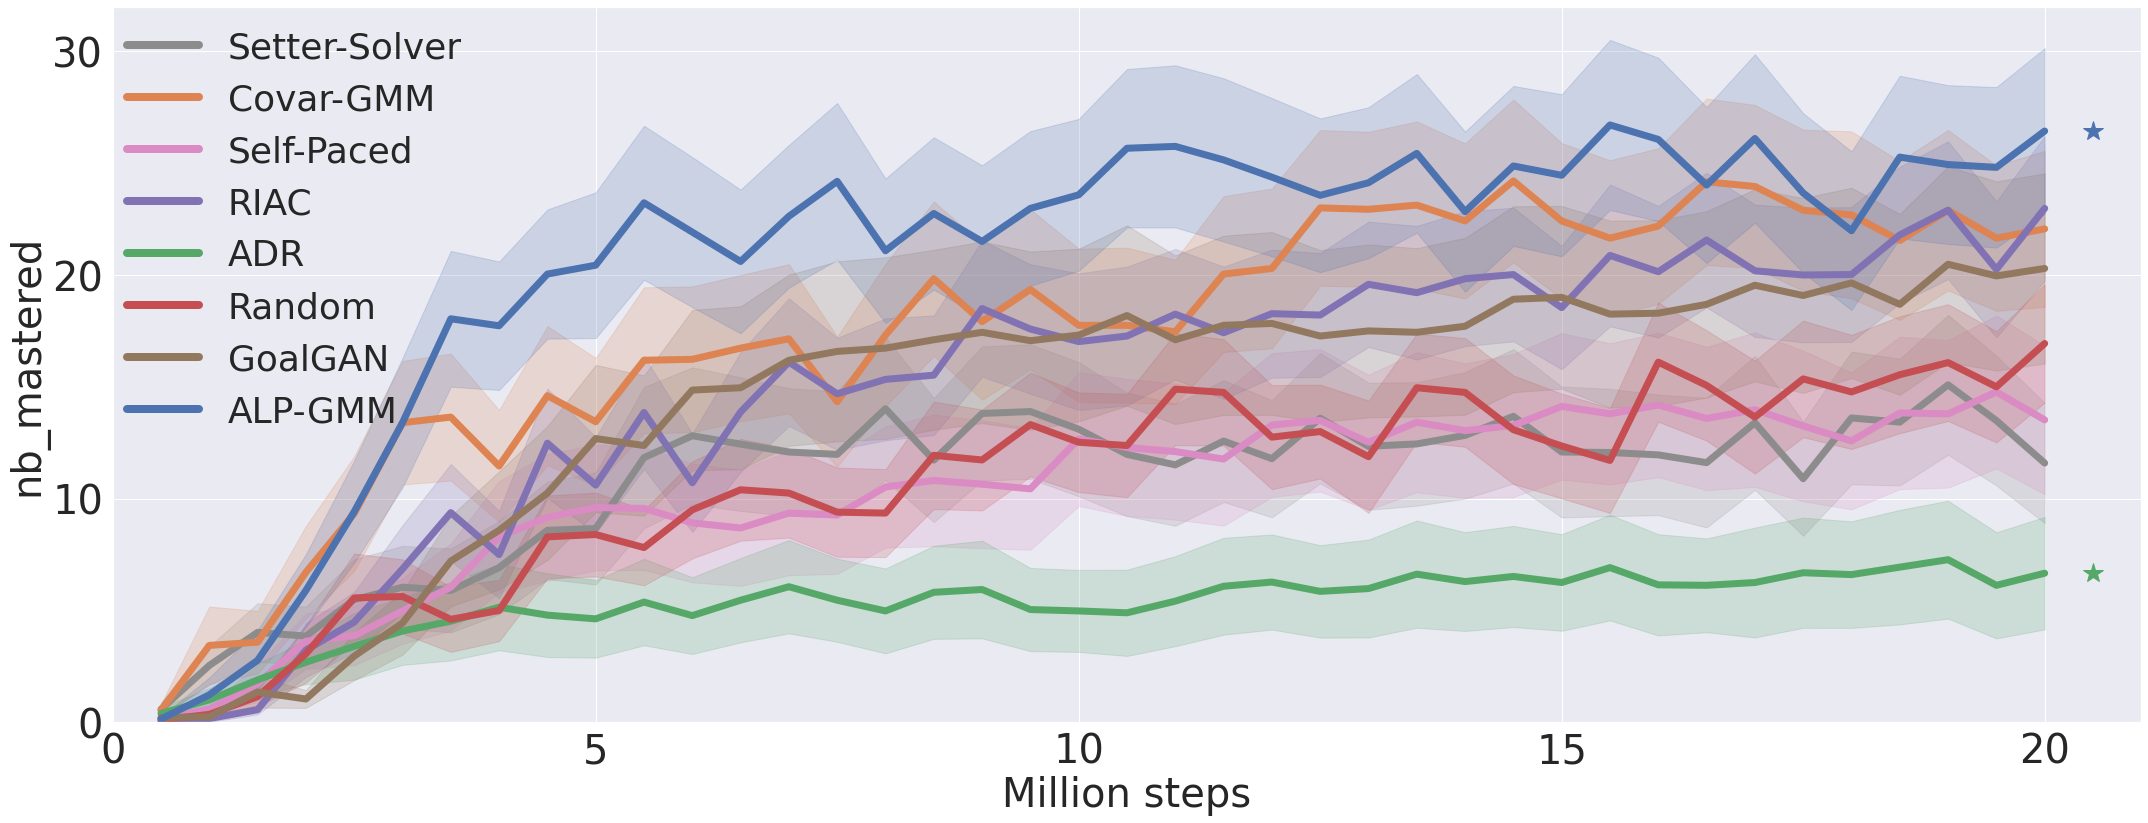

In [43]:
plot_curves("benchmark_parkour_(ADR|ALP-GMM|Covar-GMM|RIAC|Random|Setter-Solver|Self-Paced|GoalGAN)$",leg_size=36, y_max=32, plot_type="shade_se", allow_different_sizes=True, x_max=21, welch=Statistical_tests_enum.LAST_STEP, welch_baseline="benchmark_parkour_Random")

### Figure 10

### Figure 11

### Figure 12

### Figure 13

### Figure 15

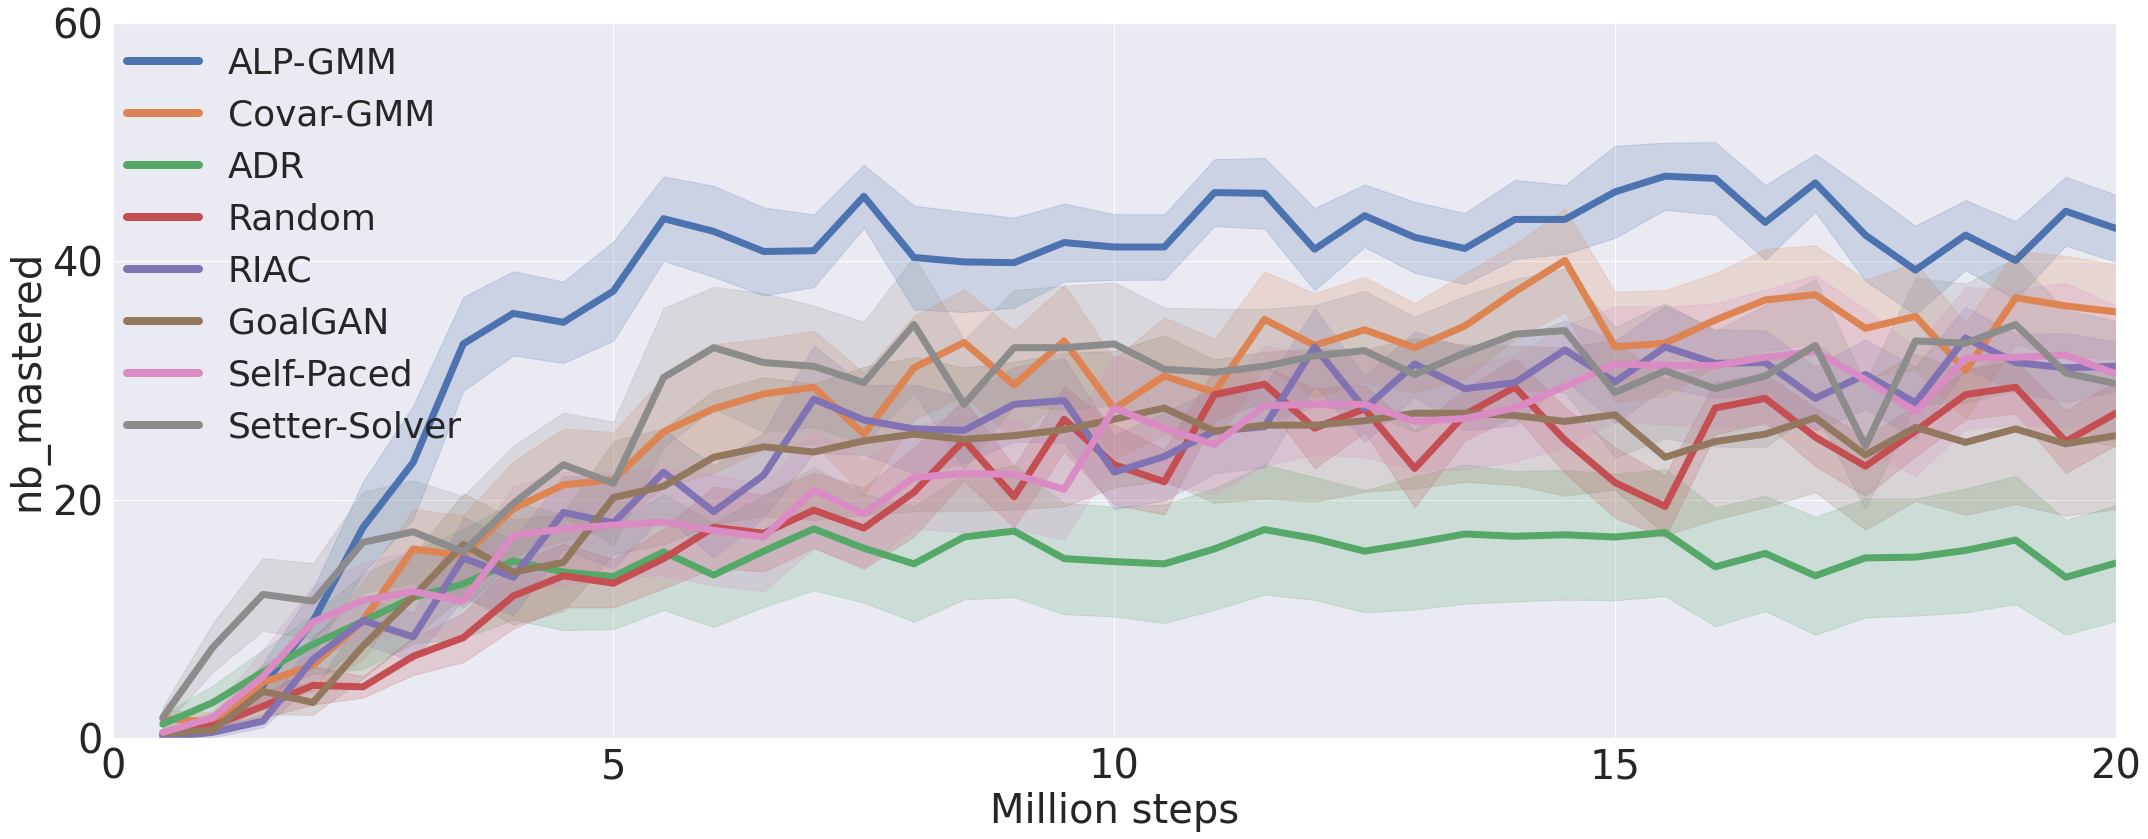

In [51]:
plot_curves("*benchmark_parkour_(ADR|ALP-GMM|Covar-GMM|RIAC|Random|Setter-Solver|Self-Paced|GoalGAN)_walker_type_old_classic_bipedal",leg_size=36, y_max=60, plot_type="shade_se", allow_different_sizes=True, x_max=20)

### Figure 16

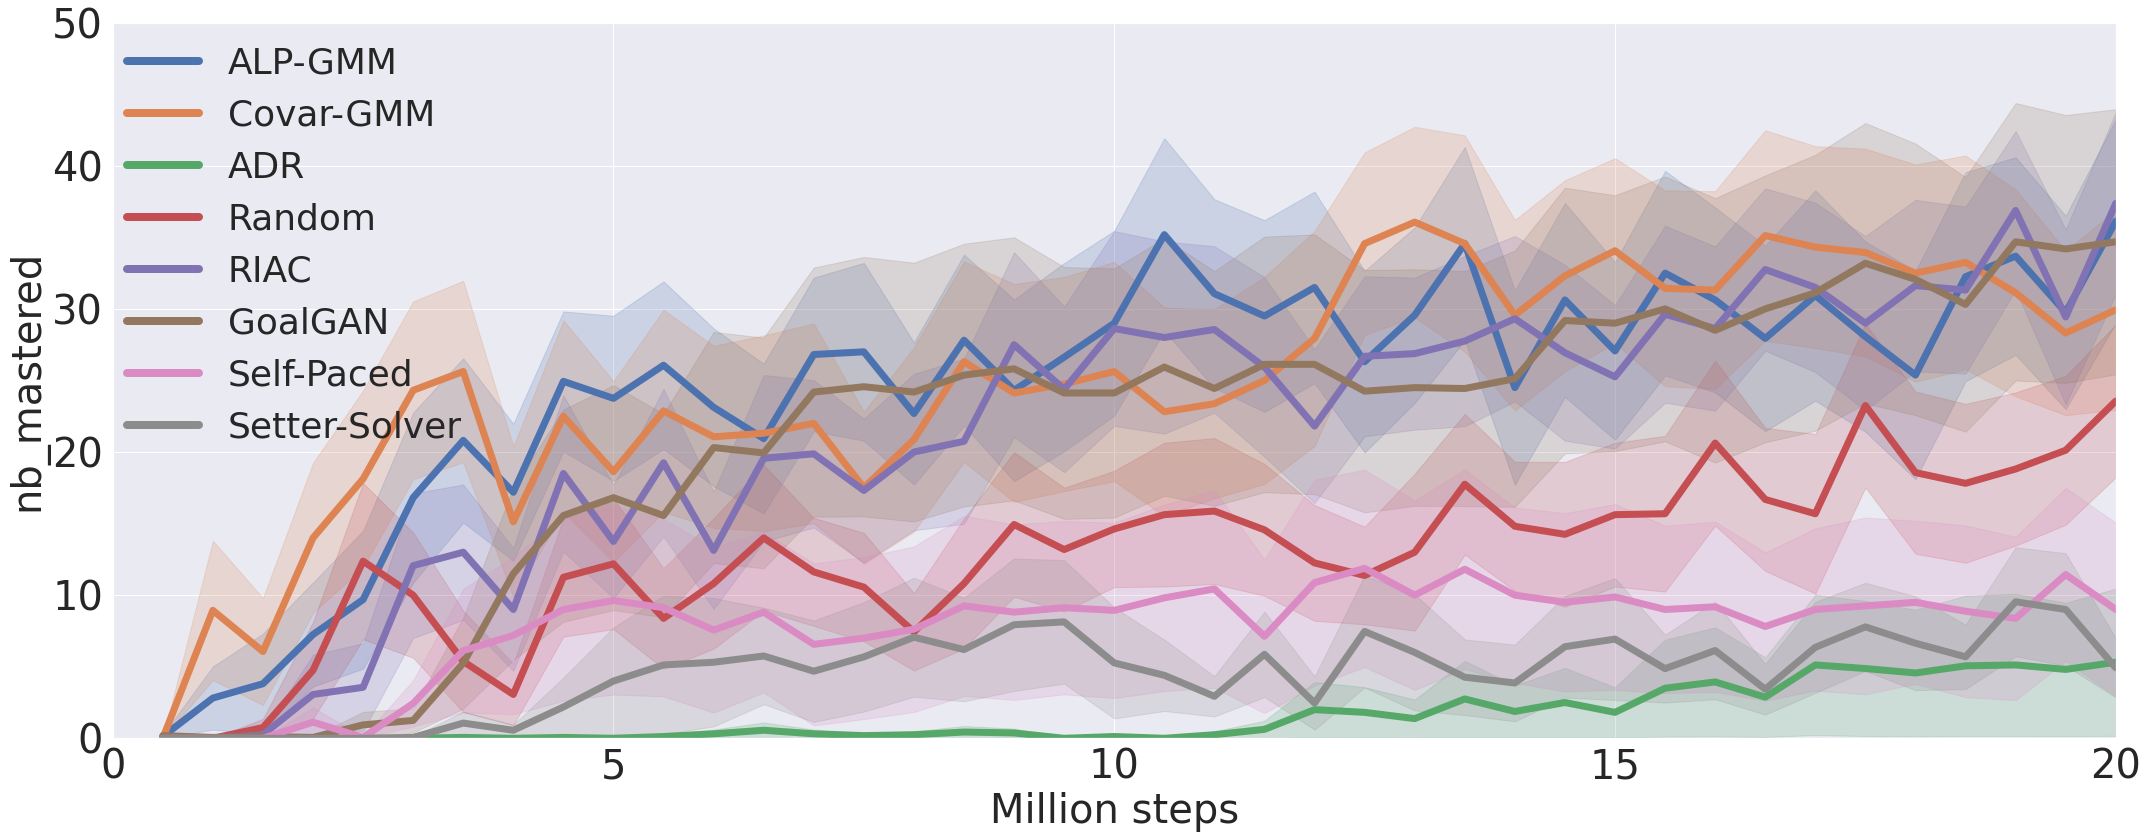

In [52]:
plot_curves("*benchmark_parkour_(ADR|ALP-GMM|Covar-GMM|RIAC|Random|Setter-Solver|Self-Paced|GoalGAN)_walker_type_fish",leg_size=36, y_max=50, plot_type="shade_se", allow_different_sizes=True, x_max=20)

### Figure 17

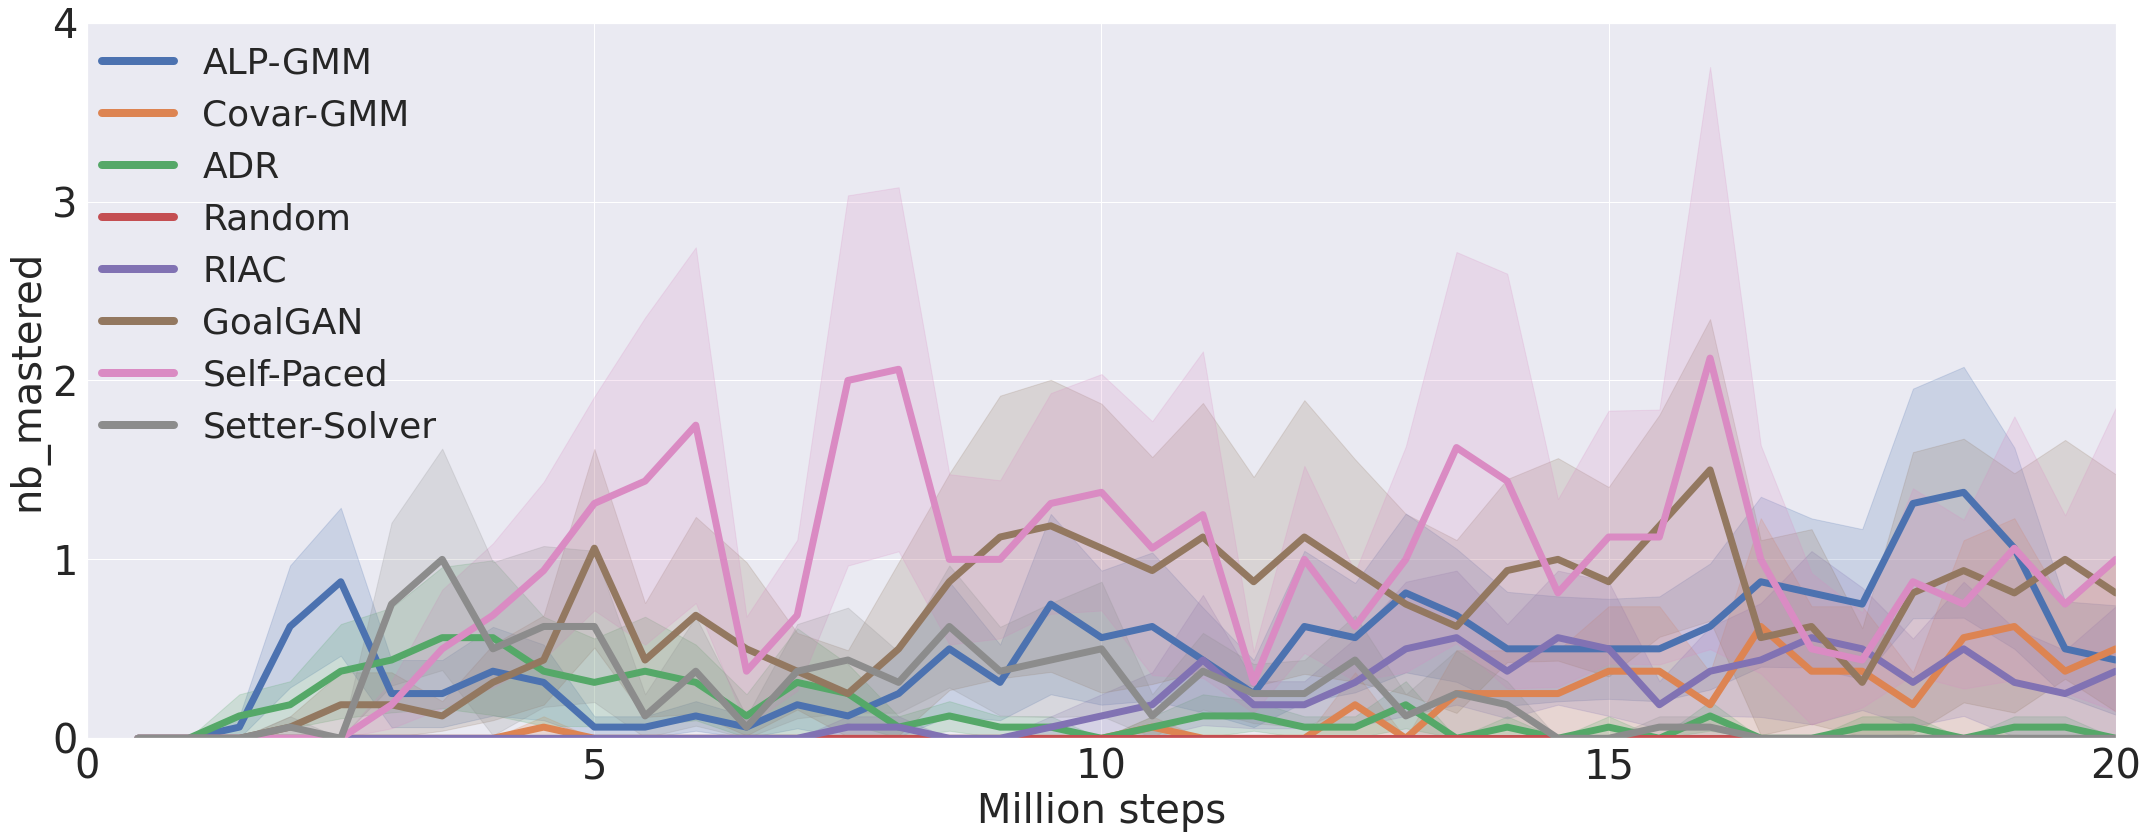

In [54]:
plot_curves("*benchmark_parkour_(ADR|ALP-GMM|Covar-GMM|RIAC|Random|Setter-Solver|Self-Paced|GoalGAN)_walker_type_climbing_profile_chimpanzee",leg_size=36, y_max=4, plot_type="shade_se", allow_different_sizes=True, x_max=20)

## Convergence plots

### Figure 10

### Figure 11

### Figure 12

### Figure 13

### Figure 15

In [ ]:
plot_curves("*profiling_benchmark_stumps_Covar-GMM_criteria_5*_no_", x_max=20, plot_type="shade_se", metric="evaluation return", allow_different_sizes=True, y_min=-300, y_max=310, welch=False)

In [ ]:
plot_curves("*subset_parkour_climbing_easy_parkour_1*Random", leg_size=30, x_max=10, welch=False, allow_different_sizes=True, plot_type="shade_se", metric="training return", y_min=-200, y_max=310)

## Comparison plots

### Parkour (figure 14)

/home/cromac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
/home/cromac/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/cromac/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/cromac/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/cromac/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/cromac/a

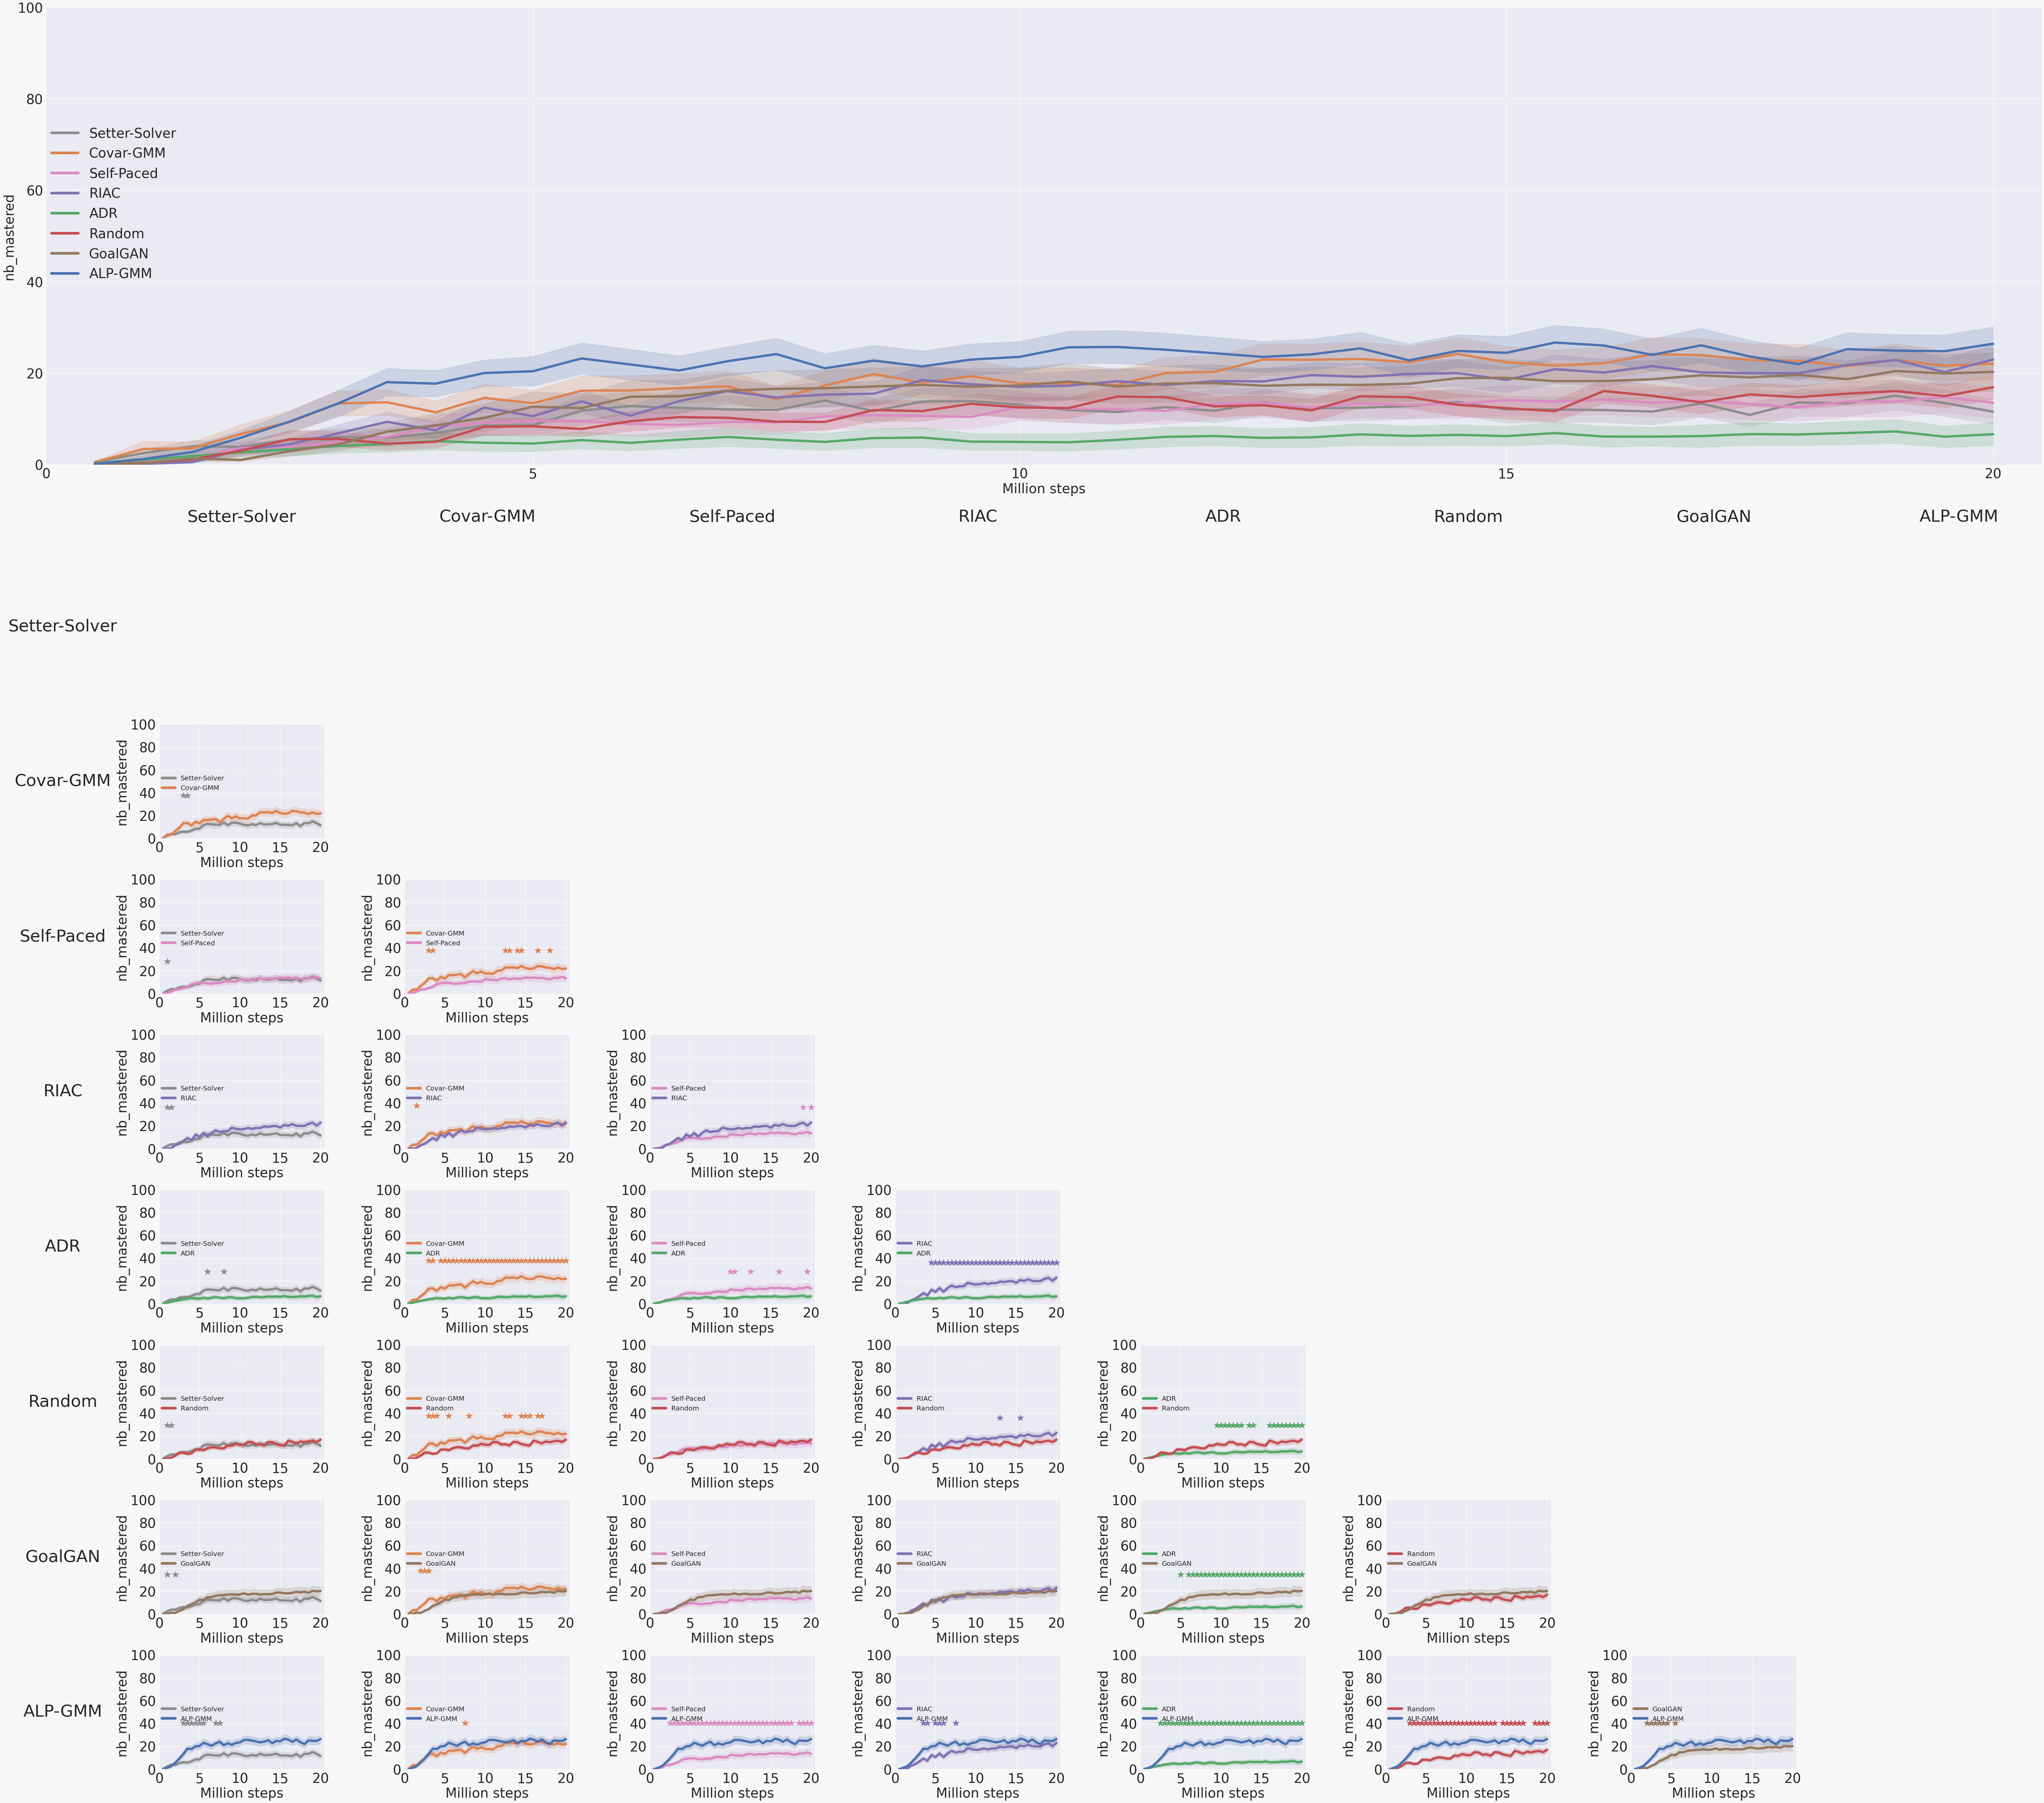

In [111]:
plot_all_comparisons("benchmark_parkour_(ADR|ALP-GMM|Covar-GMM|RIAC|Random|Setter-Solver|Self-Paced|GoalGAN)$", metric="nb_mastered", x_max=20.5, y_min=0, y_max=100, allow_different_sizes=True)

### Stump Tracks

#### Radar chart (figure 3)

In [85]:
generate_profile_chart(baseline_teacher="Random", tick_step=1)

NameError: name 'generate_profile_chart' is not defined

#### Radar chart 10 millions steps (figure 9)

In [ ]:
generate_profile_chart(baseline_teacher="Random", tick_step=1, timestep=10)

#### Bar plot (figure 8)

In [ ]:
generate_comparison_bars()